Winrate

Fit to n degree poly curve, n=3

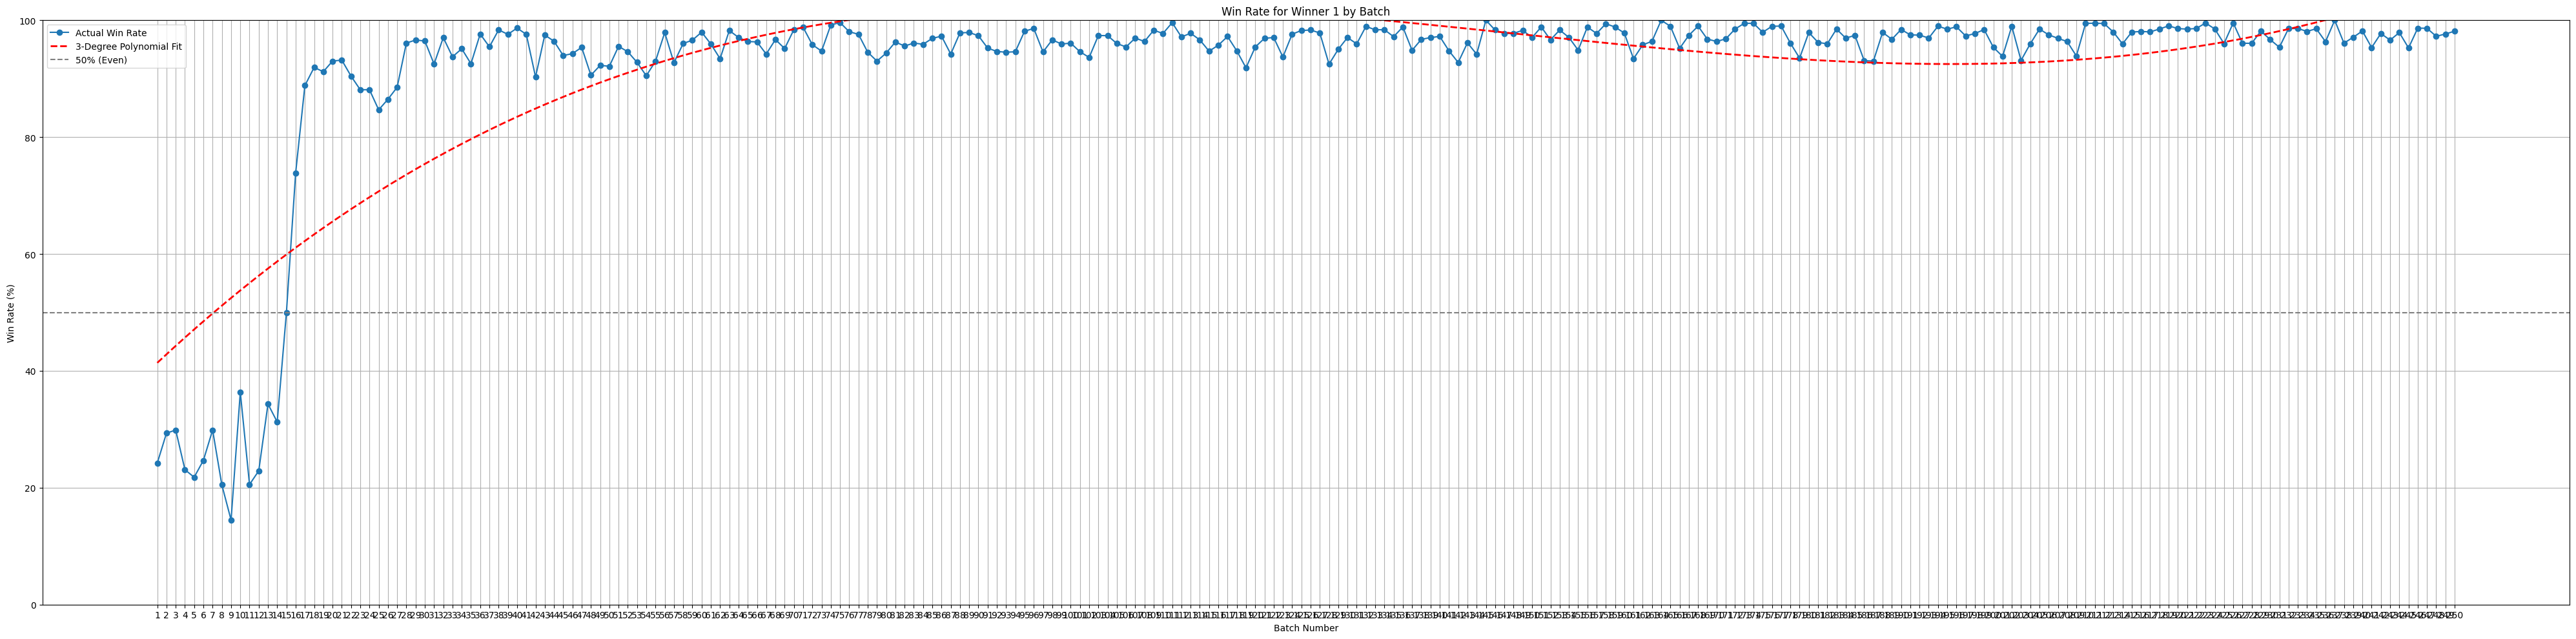

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

n = 3  # Change this to your desired degree

# Path to your episodes log database
DB_PATH = "training_episodes_log.db"

# Connect and load data into DataFrame
with sqlite3.connect(DB_PATH) as conn:
    df = pd.read_sql_query("SELECT batch_id, winner FROM episodes WHERE winner IN (1, 2)", conn)

# Group by batch and count winners
counts = df.groupby(['batch_id', 'winner']).size().unstack(fill_value=0)

# Compute win rate for winner 1 as percentage
total_games = counts[1] + counts[2]
counts['winrate_1_percent'] = (counts[1] / total_games) * 100

# Fit an n-degree polynomial to the winrate curve
x = counts.index.values
y = counts['winrate_1_percent'].values

# Fit polynomial and generate predicted curve
coeffs = np.polyfit(x, y, deg=n)
poly = np.poly1d(coeffs)
x_fit = np.linspace(x.min(), x.max(), 500)  # Smooth curve
y_fit = poly(x_fit)

# Plot
plt.figure(figsize=(40, 10))
plt.plot(x, y, marker='o', linestyle='-', label='Actual Win Rate')
plt.plot(x_fit, y_fit, color='red', linestyle='--', linewidth=2, label=f'{n}-Degree Polynomial Fit')
plt.title("Win Rate for Winner 1 by Batch")
plt.xlabel("Batch Number")
plt.ylabel("Win Rate (%)")
plt.ylim(0, 100)
plt.xticks(range(int(x.min()), int(x.max()) + 1))
plt.axhline(50, color='gray', linestyle='--', label='50% (Even)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


limit to x=75

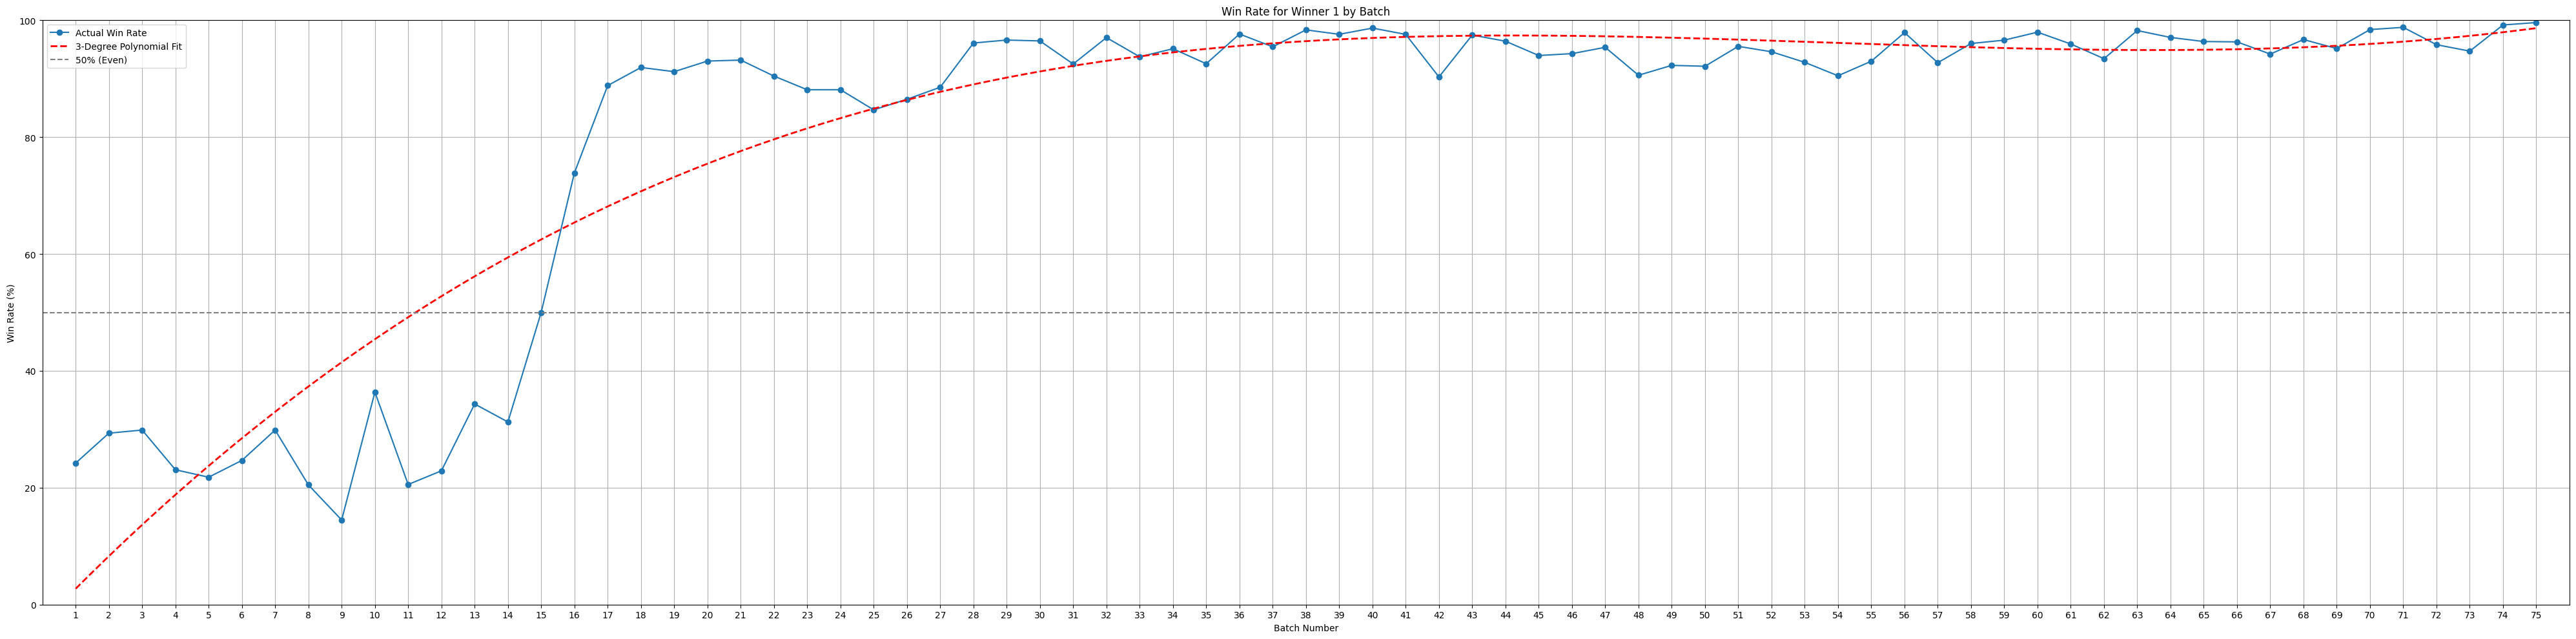

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

n = 3  # Change this to your desired degree

# Path to your episodes log database
DB_PATH = "training_episodes_log.db"

# Connect and load data into DataFrame
with sqlite3.connect(DB_PATH) as conn:
    df = pd.read_sql_query("SELECT batch_id, winner FROM episodes WHERE winner IN (1, 2)", conn)

# Group by batch and count winners
counts = df.groupby(['batch_id', 'winner']).size().unstack(fill_value=0)

# Compute win rate for winner 1 as percentage
total_games = counts[1] + counts[2]
counts['winrate_1_percent'] = (counts[1] / total_games) * 100

# Fit an n-degree polynomial to the winrate curve
x = counts.index.values
y = counts['winrate_1_percent'].values
mask = x <= 75
x = x[mask]
y = y[mask]

# Fit polynomial and generate predicted curve
coeffs = np.polyfit(x, y, deg=n)
poly = np.poly1d(coeffs)

# Limit to 75
x_fit = np.linspace(x.min(), x.max(), 500)  # Smooth curve
y_fit = poly(x_fit)

# Plot
plt.figure(figsize=(40, 10))
plt.plot(x, y, marker='o', linestyle='-', label='Actual Win Rate')
plt.plot(x_fit, y_fit, color='red', linestyle='--', linewidth=2, label=f'{n}-Degree Polynomial Fit')
plt.title("Win Rate for Winner 1 by Batch")
plt.xlabel("Batch Number")
plt.ylabel("Win Rate (%)")
plt.ylim(0, 100)
plt.xlim(0, 76)
plt.xticks(range(int(x.min()),76))
plt.axhline(50, color='gray', linestyle='--', label='50% (Even)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
